In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


In [3]:
from grid2vec.grid import load_grid

grid = load_grid("../data/grid_planning_scenario/")

/Users/sam/.pyenv/versions/3.11.5/envs/grid2vec/lib/python3.11/site-packages/pandapower/io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(self.obj, precise_float=True, convert_axes=False, **self.d)
/Users/sam/.pyenv/versions/3.11.5/envs/grid2vec/lib/python3.11/site-packages/pandapower/io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(self.obj, precise_float=True, convert_axes=False, **self.d)
/Users/sam/.pyenv/versions/3.11.5/envs/grid2vec/lib/python3.11/site-packages/pandapower/io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_jso

In [4]:
df_results = pd.read_csv('../data/grid_planning_scenario/powerflow_analysis/nminus1_dc/overloads.csv')#.sort_values("step")
df_results.head()

,step,element_type,nminus1_outage,overloaded_element,loading_value
0,3274,line,888,1144,99.061646
1,3274,line,888,1145,101.428307
2,3274,line,889,1144,99.061646
3,3274,line,889,1145,101.428307
4,3274,line,890,1144,99.061646


In [27]:
df_results = df_results[df_results['loading_value'] > 100]

In [46]:

# check if every step has an overload
df_results.sort_values("step", inplace=True)
df_results.step.is_monotonic_increasing

True

Text(0.5, 1.0, 'Number of overloads across all nminus1 outages per step')

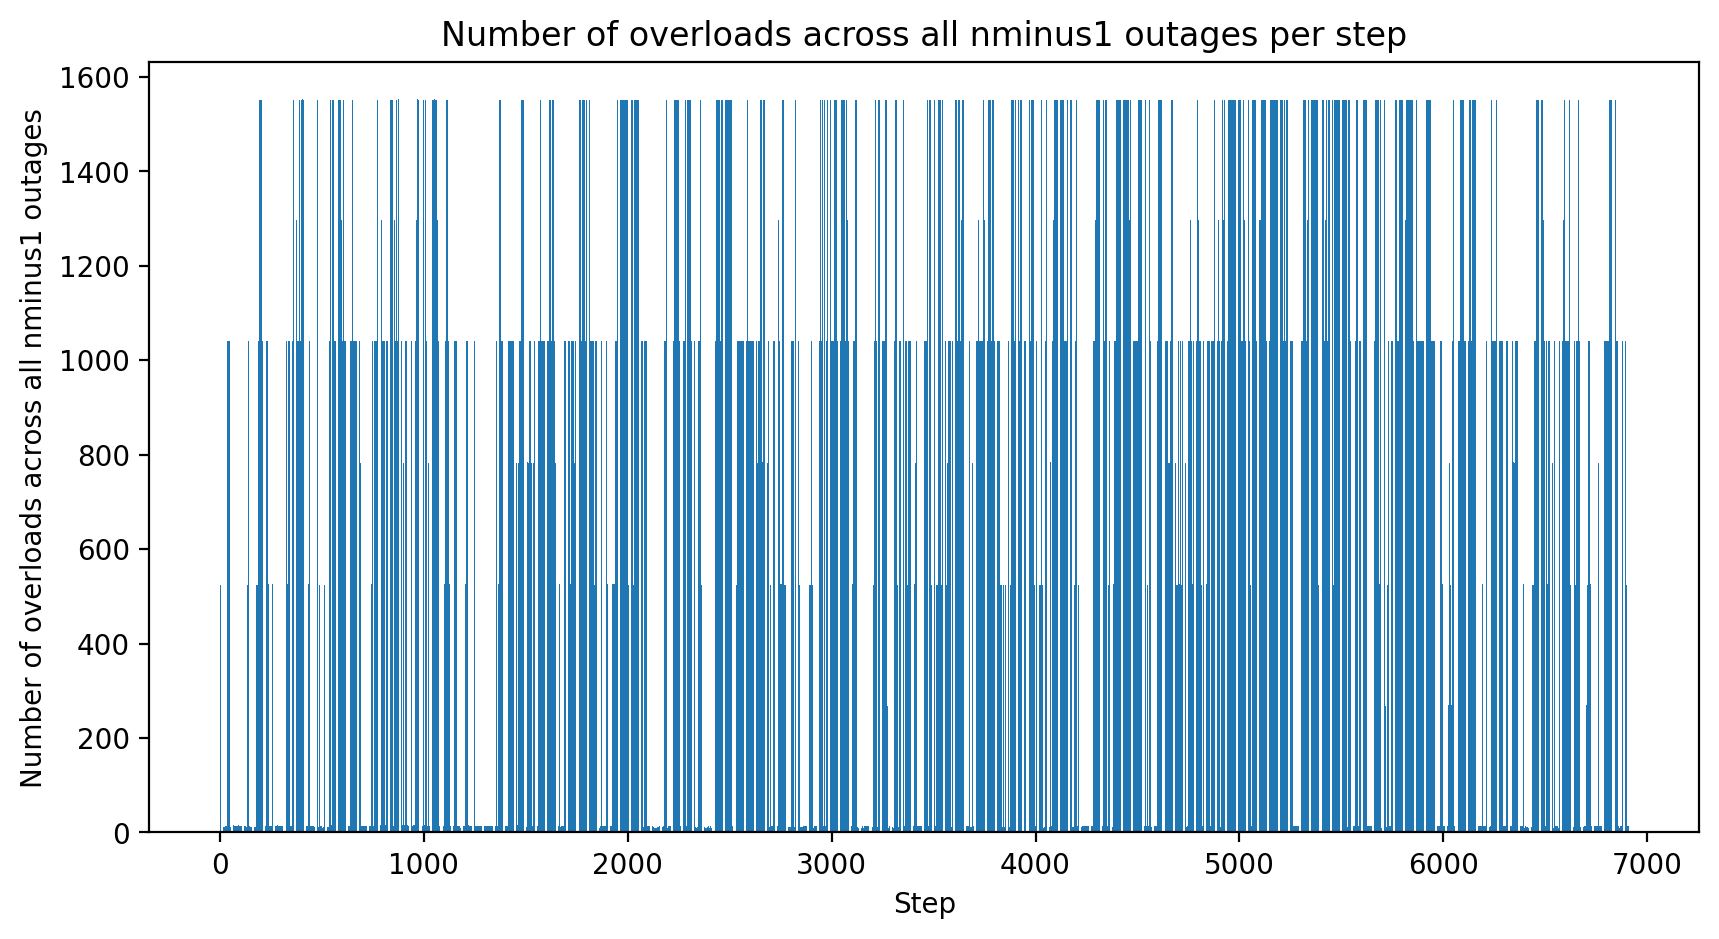

In [54]:
outages_per_step = df_results.groupby("step")['nminus1_outage'].count()


fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(outages_per_step.index, outages_per_step.values, color='C0')
ax.set_xlabel("Step")
ax.set_ylabel("Number of overloads across all nminus1 outages")
ax.set_title("Number of overloads across all nminus1 outages per step")

<Axes: >

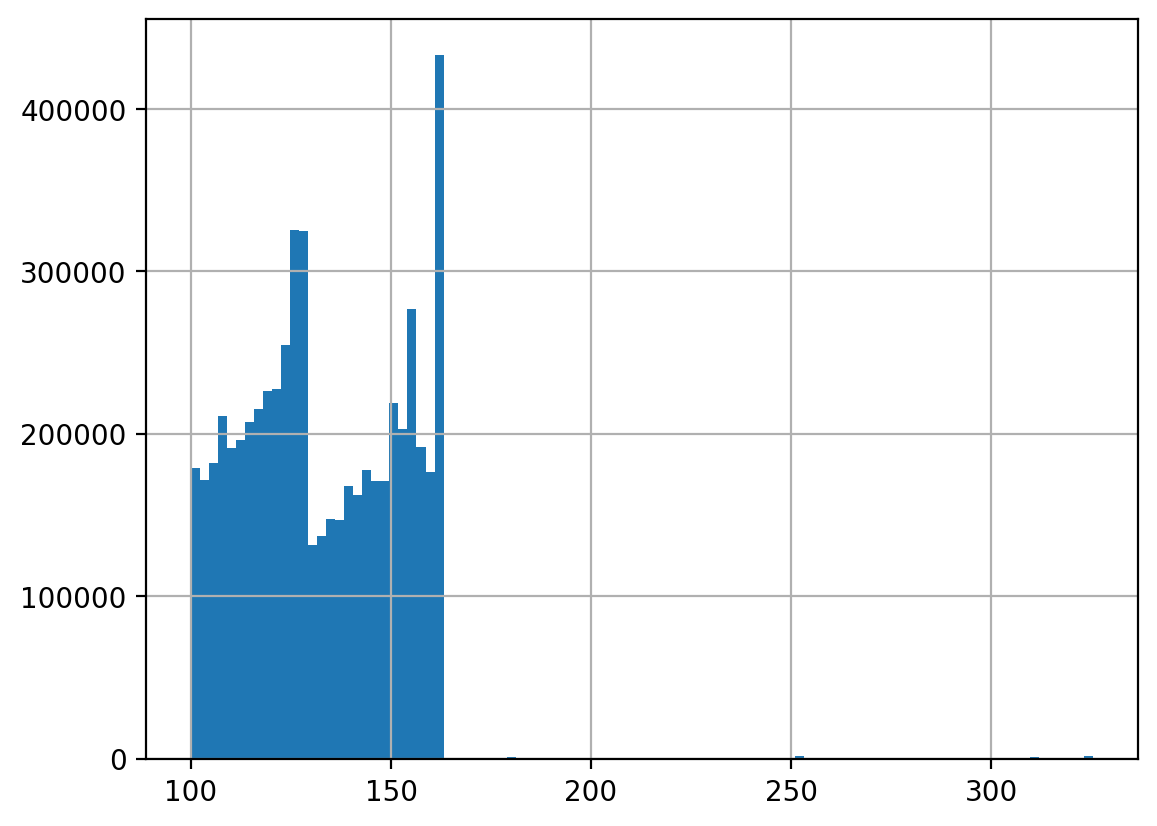

In [48]:
# here we have quite a mixture of overload values
df_results['loading_value'].hist(bins=100)

Text(0, 0.5, 'Number of occurrences')

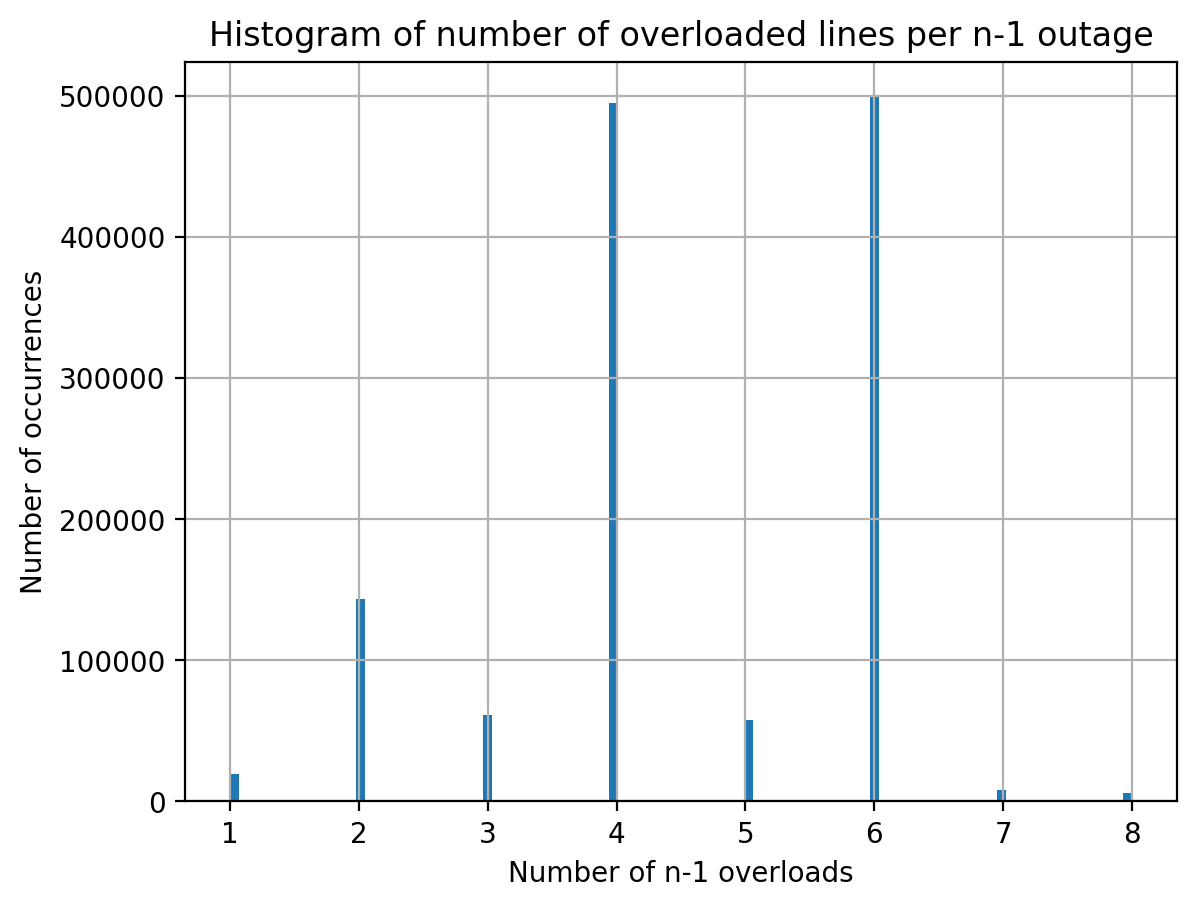

In [18]:
df_results.groupby(["step", "nminus1_outage"])[['overloaded_element']].count().hist(bins=100)
plt.title("Histogram of number of overloaded lines per n-1 outage")
plt.xlabel("Number of n-1 overloads")
plt.ylabel("Number of occurrences")

In [43]:
pd.DataFrame(df_results['overloaded_element'].value_counts()).join(grid.net.line[["name"]])

,count,name
overloaded_element,,
1098,1174303,BA - BWW
1099,1171743,BA - BWW
1103,1119924,BAZ - BA
1102,1067658,BAZ - BA
1145,643735,BAZ - BA_KF32
1144,608407,BAZ - XBA_KF31
1119,13806,LUB - ABS
1120,13806,LUB - WIK
1128,13806,LUB - WIK


Text(0, 0.5, 'Number of steps')

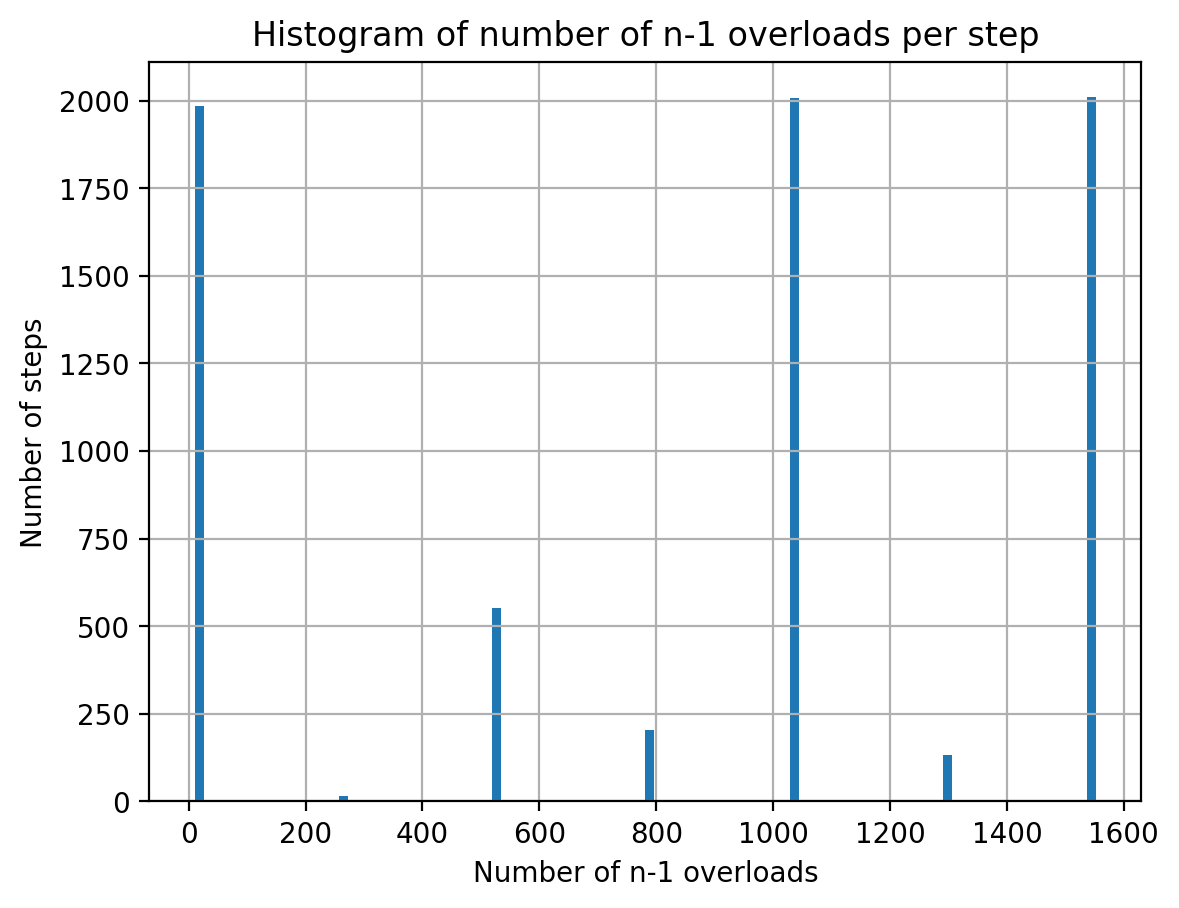

In [31]:
df_results.groupby("step")[['nminus1_outage']].count().hist(bins=100)
plt.title("Histogram of number of n-1 overloads per step")
plt.xlabel("Number of n-1 overloads")
plt.ylabel("Number of steps")

In [19]:
overloaded_element_counts = pd.DataFrame(df_results["overloaded_element"].value_counts())

In [45]:
avg_num_overloaded_lines_per_nminus1 = (
    df_results.groupby(["step", "nminus1_outage"])[["overloaded_element"]]
    .count()
    .reset_index()
    .groupby("nminus1_outage")[["overloaded_element"]]
    .mean()
    .sort_values("overloaded_element", ascending=False)
    .join(grid.net.line[["name"]])
    .rename(columns={"overloaded_element": "average number of lines overloaded on n-1"})
)
avg_num_overloaded_lines_per_nminus1.head()

,average number of lines overloaded on n-1,name
nminus1_outage,,
1119,5.254817,LUB - ABS
1120,5.254817,LUB - WIK
1128,5.254817,LUB - WIK
888,4.568524,KRU - WE
1126,4.568524,HND - EHH-1-2


In [38]:
grid.net.line.loc[[1119, 1128, 1120]]

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,r0_ohm_per_km,x0_ohm_per_km,c0_nf_per_km,g0_us_per_km,endtemp_degree,guid_unique_line,old_index
1119,LUB - ABS,None,2486,2327,1.0,0.052171,0.31354,496.01,0.0,0.855,1.0,1,None,True,0.130428,0.78385,0.0,0.0,90.0,2f743fec-75b0-4880-9f15-5ddb73b1ce1b,1473
1128,LUB - WIK,None,2487,2351,1.0,0.052171,0.31354,496.01,0.0,0.855,1.0,1,None,True,0.130428,0.78385,0.0,0.0,90.0,75565bc2-c996-45f4-8dba-3d18ecd79d24,1482
1120,LUB - WIK,None,2486,2329,1.0,0.052171,0.31354,496.01,0.0,0.855,1.0,1,None,True,0.130428,0.78385,0.0,0.0,90.0,69e48c45-60f1-43e9-b5e6-a7204ff6eddb,1474


In [44]:
grid.net.line.head()

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,r0_ohm_per_km,x0_ohm_per_km,c0_nf_per_km,g0_us_per_km,endtemp_degree,guid_unique_line,old_index
0,Puenderich - 20_1 km - 680 A,None,38,14,1.0,2.1960,8.3215,175.0,0.0,0.680,1.0,1,None,True,4.3927,20.6010,80.2,0.0,NaN,5f8510b2-6991-43e8-a893-9b239c5de9d2,0
1,Koblenz West - 10_4 km - 680 A,None,15,1,1.0,1.0356,3.8929,101.1,0.0,0.680,1.0,1,None,True,2.2006,10.3167,42.9,0.0,NaN,7b31cbb7-cd40-414d-a171-a4cabe204620,1
2,Mandern Ost - 7_1 km - 645 A,None,41,1552,1.0,0.8386,2.7681,65.2,0.0,0.645,1.0,1,None,True,1.5543,7.0650,28.3,0.0,NaN,f121a2db-3f5a-4be7-9207-ed62ed8565ae,2
3,Hermeskeil Ost - 7_1 km - 645 A,None,41,1553,1.0,0.8386,2.7682,65.2,0.0,0.645,1.0,1,None,True,1.5543,7.0650,28.3,0.0,NaN,80304b26-35b4-4c47-9827-7c2eeb0ad2ca,3
4,Bekond - 16_9 km - 645 A,None,34,38,1.0,1.9899,7.2651,141.6,0.0,0.645,1.0,1,None,True,3.7106,18.4730,67.4,0.0,NaN,12f872b7-a18d-4f14-b735-dbe8dc575698,4


In [35]:
grid.line_for_reward.sum()

Array(258, dtype=int32)

<Axes: >

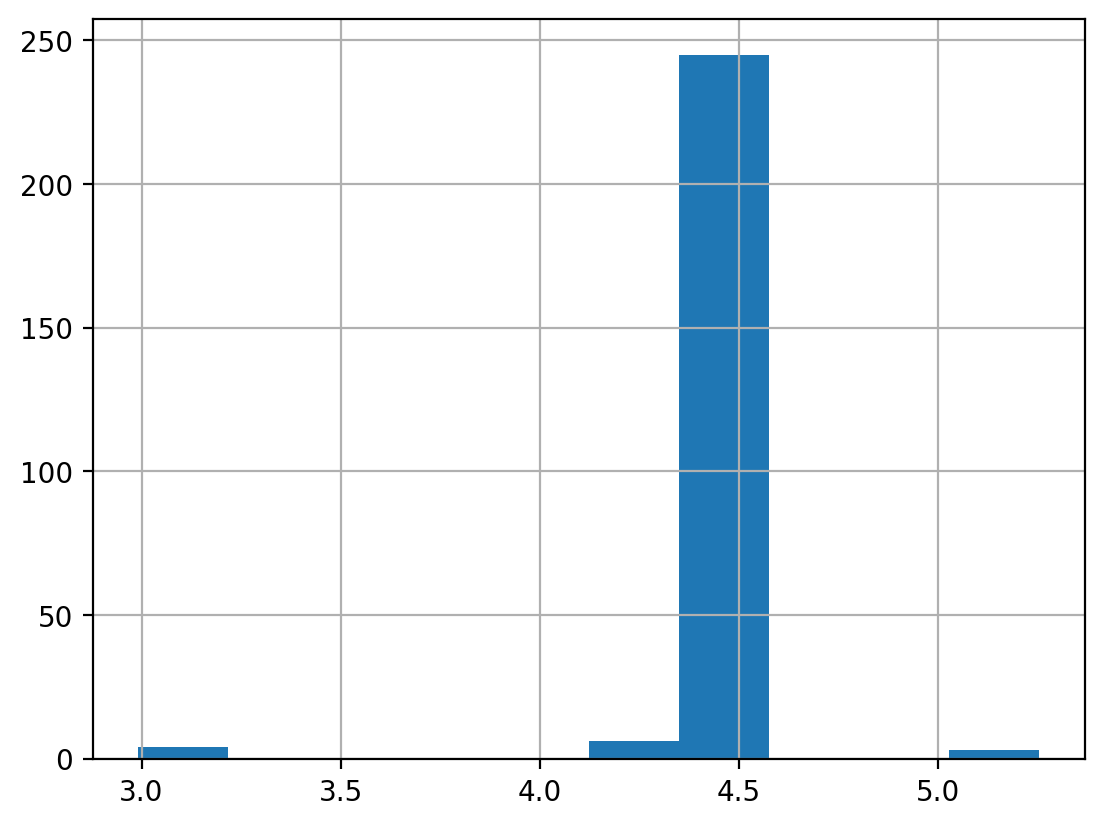

In [21]:
avg_num_overloaded_lines_per_nminus1['average number of lines overloaded on n-1'].hist()

In [25]:
len(df_results.step.unique())

6903

In [26]:
max_step = df_results.groupby("step")['loading_value'].mean().idxmax()

df_results[df_results['step'] == max_step].sort_values("loading_value", ascending=False)    

,step,element_type,nminus1_outage,overloaded_element,loading_value
6574563,200,line,1098,1099,325.457672
6574568,200,line,1099,1098,325.457672
6574575,200,line,1102,1103,323.971741
6574580,200,line,1103,1102,311.137329
6574797,200,line,1145,1144,253.223801
6574792,200,line,1144,1145,253.223801
6573991,200,line,948,1098,162.903519
6574920,200,line,1418,1098,162.903519
6574111,200,line,968,1098,162.903519
6574932,200,line,1420,1098,162.903519


In [ ]:
df_results.